In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'forecast_history.csv'
forecast_data = pd.read_csv(file_path)

# Clean the data by removing non-numeric characters and converting to numeric
forecast_data = forecast_data.applymap(lambda x: pd.to_numeric(str(x).replace('%', '').replace('$', '').replace(',', ''), errors='coerce'))

# Calculate the actual percentage change in median house prices year-over-year
forecast_data['Actual Change (%)'] = forecast_data['Median house price'].pct_change() * 100

# Calculate the absolute error for each forecaster
forecast_data['Westpac Error'] = (forecast_data['Westpac: 4 year forecast'] - forecast_data['Actual Change (%)']).abs()
forecast_data['Joe Bloggs Error'] = (forecast_data['Joe Bloggs: 2 year forecast'] - forecast_data['Actual Change (%)']).abs()
forecast_data['Harry Spent Error'] = (forecast_data['Harry Spent: 5 year forecast'] - forecast_data['Actual Change (%)']).abs()

# Drop rows with missing values
result = forecast_data[['Unnamed: 0', 'Median house price', 'Actual Change (%)', 'Westpac: 4 year forecast', 'Joe Bloggs: 2 year forecast', 'Harry Spent: 5 year forecast', 'Westpac Error', 'Joe Bloggs Error', 'Harry Spent Error']].dropna()
print(result)

    Unnamed: 0  Median house price  Actual Change (%)  \
1         2012            370000.0           8.823529   
3         2014            420000.0          20.000000   
4         2015            425000.0           1.190476   
5         2016            500000.0          17.647059   
6         2017            520000.0           4.000000   
8         2019            596000.0           8.363636   
9         2020            610000.0           2.348993   
10        2021            660000.0           8.196721   
11        2022            720000.0           9.090909   

    Westpac: 4 year forecast  Joe Bloggs: 2 year forecast  \
1                       53.0                           34   
3                       13.0                           42   
4                       33.0                           23   
5                       -5.0                           15   
6                       45.0                         1500   
8                       34.0                           19   
9 

In [20]:
print("Column names:", result.columns)

Column names: Index(['Unnamed: 0', 'Median house price', 'Actual Change (%)',
       'Westpac: 4 year forecast', 'Joe Bloggs: 2 year forecast',
       'Harry Spent: 5 year forecast', 'Westpac Error', 'Joe Bloggs Error',
       'Harry Spent Error'],
      dtype='object')


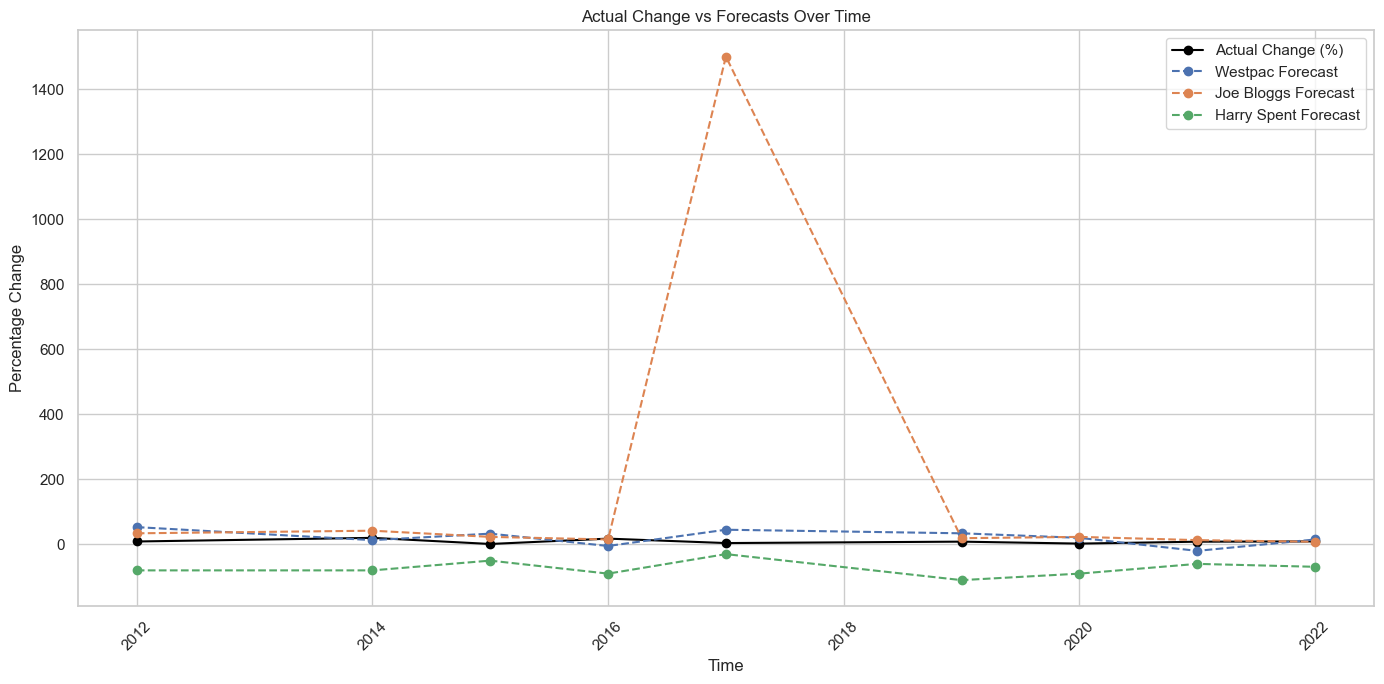

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(result['Unnamed: 0'], result['Actual Change (%)'], marker='o', label='Actual Change (%)', color='black')
plt.plot(result['Unnamed: 0'], result['Westpac: 4 year forecast'], marker='o', label='Westpac Forecast', linestyle='--')
plt.plot(result['Unnamed: 0'], result['Joe Bloggs: 2 year forecast'], marker='o', label='Joe Bloggs Forecast', linestyle='--')
plt.plot(result['Unnamed: 0'], result['Harry Spent: 5 year forecast'], marker='o', label='Harry Spent Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Percentage Change')
plt.title('Actual Change vs Forecasts Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot helps you visualize how actual changes compare to forecasts over time.

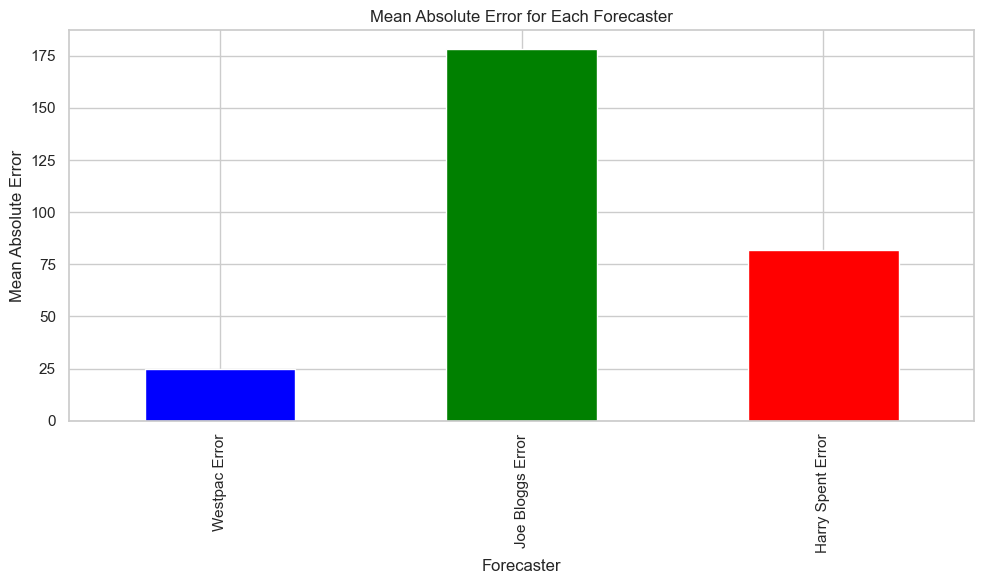

In [15]:
# Bar plot of absolute errors for each forecaster
plt.figure(figsize=(10, 6))
errors = result[['Westpac Error', 'Joe Bloggs Error', 'Harry Spent Error']].mean()
errors.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Forecaster')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Each Forecaster')
plt.tight_layout()
plt.show()

Shows the average absolute error for each forecaster, making it easy to see which forecaster had the least error on average.

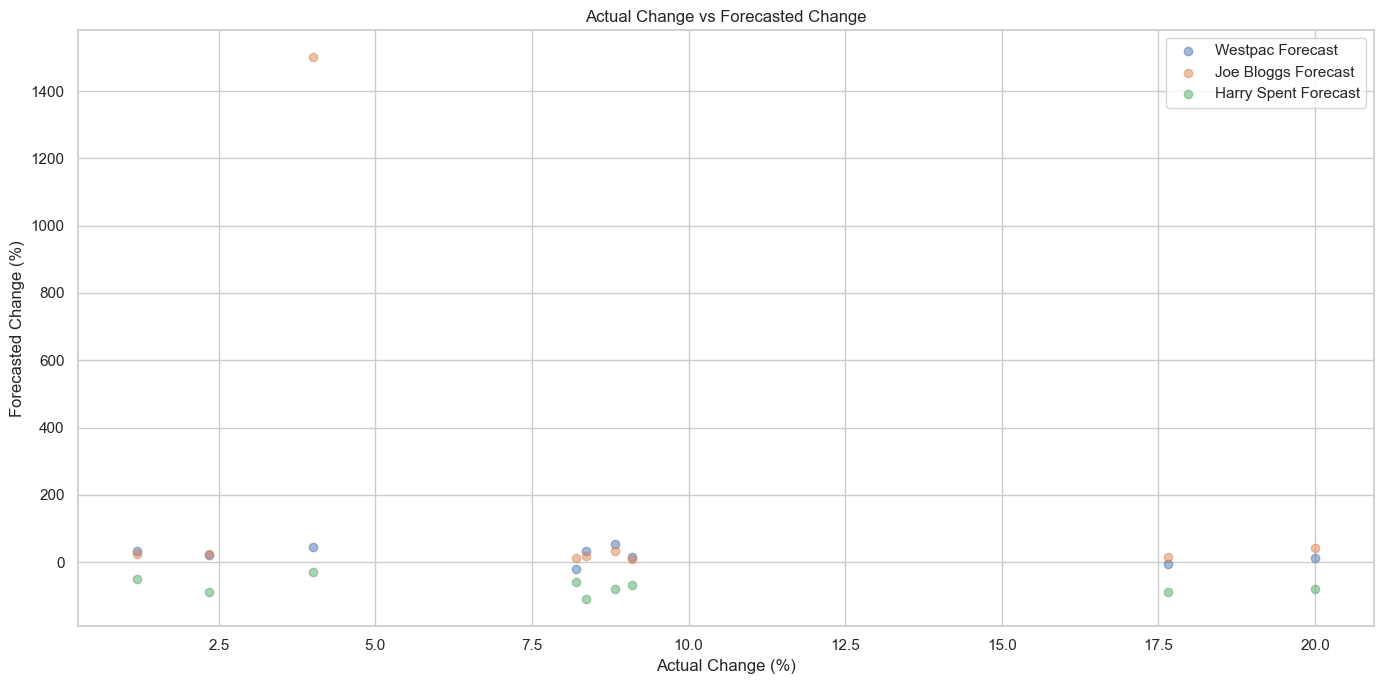

In [16]:
# Scatter plot of actual changes vs forecasts
plt.figure(figsize=(14, 7))
plt.scatter(result['Actual Change (%)'], result['Westpac: 4 year forecast'], alpha=0.5, label='Westpac Forecast')
plt.scatter(result['Actual Change (%)'], result['Joe Bloggs: 2 year forecast'], alpha=0.5, label='Joe Bloggs Forecast')
plt.scatter(result['Actual Change (%)'], result['Harry Spent: 5 year forecast'], alpha=0.5, label='Harry Spent Forecast')
plt.xlabel('Actual Change (%)')
plt.ylabel('Forecasted Change (%)')
plt.title('Actual Change vs Forecasted Change')
plt.legend()
plt.tight_layout()
plt.show()

Illustrates the relationship between actual changes and each forecaster's predictions, which can help in assessing the correlation between the forecasts and actual data.

In [5]:
# Determine the most accurate forecaster each year
data['Best Forecaster'] = data[['Westpac Error', 'Joe Bloggs Error', 'Harry Spent Error']].idxmin(axis=1)

# Display the results
best_forecaster_summary = data[['Unnamed: 0', 'Best Forecaster']]
print(best_forecaster_summary)

    Unnamed: 0    Best Forecaster
0         2011                NaN
1         2012   Joe Bloggs Error
2         2013   Joe Bloggs Error
3         2014      Westpac Error
4         2015   Joe Bloggs Error
5         2016   Joe Bloggs Error
6         2017  Harry Spent Error
7         2018   Joe Bloggs Error
8         2019   Joe Bloggs Error
9         2020      Westpac Error
10        2021   Joe Bloggs Error
11        2022   Joe Bloggs Error
12        2023  Harry Spent Error
13        2024   Joe Bloggs Error


Joe Bloggs seems to be the most reliable forecaster based on this analysis, with the most frequent occurrences of having the smallest error. However, it’s worth noting that Westpac also had some strong years, and Harry Spent occasionally performed well, particularly in 2017 and 2023.